# Student Performance Indicator

The **Student Performance Indicator** project leverages machine learning to analyze and predict student's outcomes based on various academic and behavioral factors. This initiative aims to provide valuable insights for educators, institutions, and students to enhance learning outcomes and decision-making processes.

This Exploratory Data Analysis (EDA) notebook focuses on understanding student performance based on various factors. 
It follows a structured ML Lifecycle, including:

* Understanding the Problem Statement
* Data Collection
* Data Checks
* Exploratory Data Analysis (EDA)
* Data Pre-processing
* Model Training
* Model Selection (Choosing Best Model)


### 1) Problem Statement
This project aims to analyze how student performance (test scores) is affected by variables such as: 
* Gender
* Ethnicity
* Parental Level of Education
* Lunch Type
* Test Preparation Course
affects the student scores in math, reading, and writing.

### 2) Data Collection
* Data Source: "https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977"
* The dataset contains student exam scores along with demographic and background information.

### 2.1 Import Data & Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [74]:
import pandas as pd                     # Data Manipulation library
import numpy as np                      # For Numerical Operations
import seaborn as sns                   # For Visualization
import matplotlib.pyplot as plt         # For Visualization
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')       # To ignore any warnings

### Import Data as Pandas DataFrame

In [75]:
df = pd.read_csv(r"data\StudentsPerformance.csv")

### Get Top 5 Records

In [76]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [77]:
df.shape            # Get the size of dataframe

(1000, 8)

In [78]:
df.nunique()                # Checking unique categories in each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 2.2 Dataset Information
* **gender :** sex of students -> (Male/female)
* **race/ethnicity :** ethnicity of students -> (Group A, B,C, D,E)
* **parental level of education :** parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* **lunch :** having lunch before test (standard or free/reduced)
* **test preparation course :** complete or not complete before test
* math score
* reading score
* writing score

### 3) Data Checks to perform
* Check Missing vaues
* Check Duplicates
* Check datatypes
* Check number of uniques values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [79]:
df.isna().sum()             # Checking Missing Values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### There are no missing values in the dataset

In [80]:
df.duplicated().sum()           # Checking Duplicates values

0

##### There are  no duplicates values in the dataset

In [81]:
df.info()               # Checking datadtype of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### There are total 8 columns having; 6 columns have datatype of 'object' (string) and 3 columns have datatype of 'integer'

In [82]:
df.describe()               # Checking Statistical summary of the dataset (numerical columns only)

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
* From above description of numerical data, all means are very close to each other - between **66.08** and **68.05**
* All standard deviations are also close - between **14.60** and **15.19**
* While there is a minimum score of **0** for math, and minimum score for reading **= 10** and minimum score for reading **= 17** 
* The maximum score for math, reading and writing is **= 100**

### Exploring Data

In [83]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [84]:
# For dynamic purpose I've use for loop here to get the unique values in the each columns
# considering only categorical features i.e. 'object' not including numerical columns
for i in df.columns:
    if df[i].dtype == 'object':
        print(f"Categories in '{i}' variable are: {df[i].unique()}")

Categories in 'gender' variable are: ['female' 'male']
Categories in 'race/ethnicity' variable are: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable are: ['standard' 'free/reduced']
Categories in 'test preparation course' variable are: ['none' 'completed']


In [85]:
# Create a list of categorial and numerical features
numeric_features = []
categorical_features = []

for feature in df.columns:
    if df[feature].dtype != 'object':
        numeric_features.append(feature)
        
    if df[feature].dtype == 'object':
        categorical_features.append(feature)
        
# print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding columns for 'Total Score' and 'Average'

In [86]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = round(df['total_score'] / 3, 2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


### Number of students having score '100/100' in maths, reading, writing

In [87]:
math_full = df[df['math score'] == 100]['average'].count()
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()

print(f"Numer of students with full marks in Maths: {math_full}")
print(f"Numer of students with full marks in Reading: {reading_full}")
print(f"Numer of students with full marks in writing: {writing_full}")

Numer of students with full marks in Maths: 7
Numer of students with full marks in Reading: 17
Numer of students with full marks in writing: 14


### Number of students having score '<20' in maths, reading, writing

In [88]:
math_less_than_20 = df[df['math score'] <= 20]['average'].count()
reading_less_than_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_than_20 = df[df['writing score'] <= 20]['average'].count()

print(f"Numer of students with full marks in Maths: {math_less_than_20}")
print(f"Numer of students with full marks in Reading: {reading_less_than_20}")
print(f"Numer of students with full marks in writing: {writing_less_than_20}")

Numer of students with full marks in Maths: 4
Numer of students with full marks in Reading: 1
Numer of students with full marks in writing: 3


### Insights
* From above insights we get to know that student have performed the **worst** in Maths
* Best performance is in reading section

## 4) Exploring Data (Visualization)
### 4.1 Visualize average score distribution to make some conclusion
* **Histogram:** A histogram is a bar plot that shows the distribution of a numerical variable by dividing the data into intervals (bins). It helps in understanding frequency distribution and data spread
* **Kernel Distribution Function (KDE):** A KDE plot estimates the probability density function (PDF) of a continuous variable. It smooths the histogram into a curve, making it easier to see data distribution trends

#### 4.1.1 Histogram & KDE

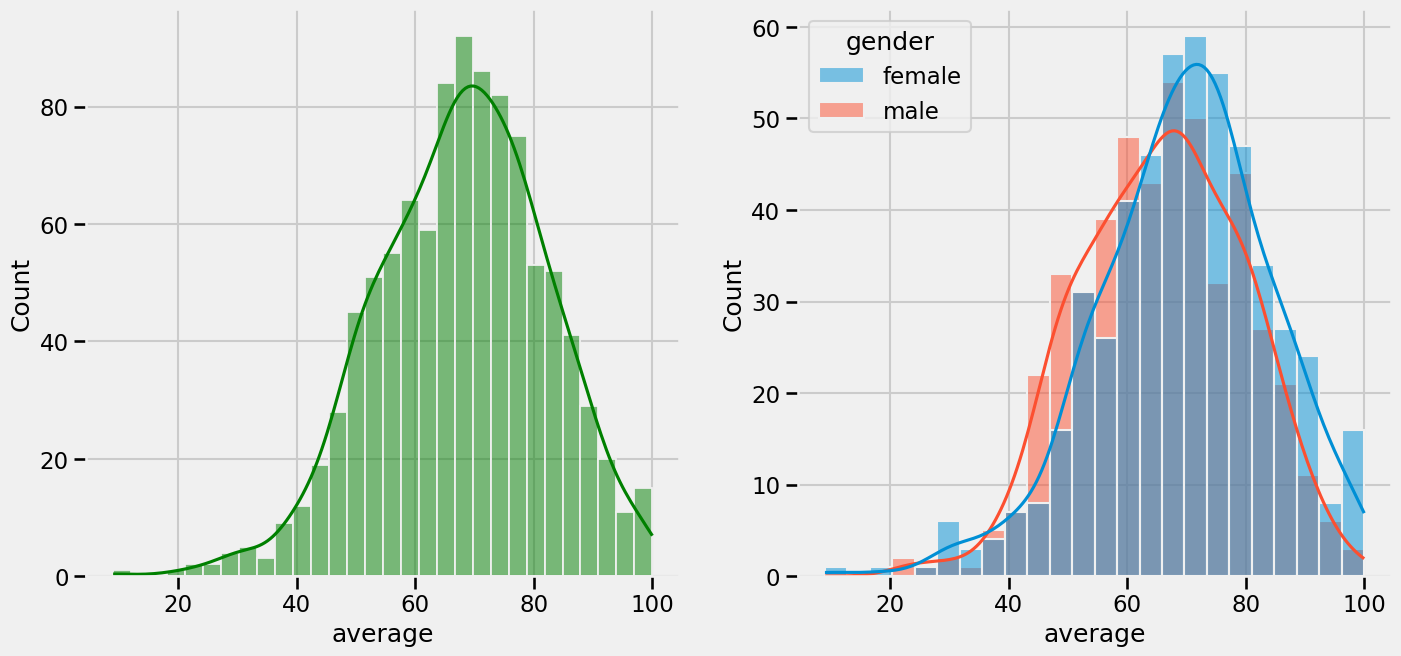

In [89]:
fig, axs = plt.subplots(1, 2, figsize= (15, 7))
plt.subplot(121)

sns.histplot(data= df, x= 'average', bins= 30, kde= True, color= 'g')
plt.subplot(122)

sns.histplot(data= df, x= 'average' , kde=True, hue= 'gender')
plt.show()

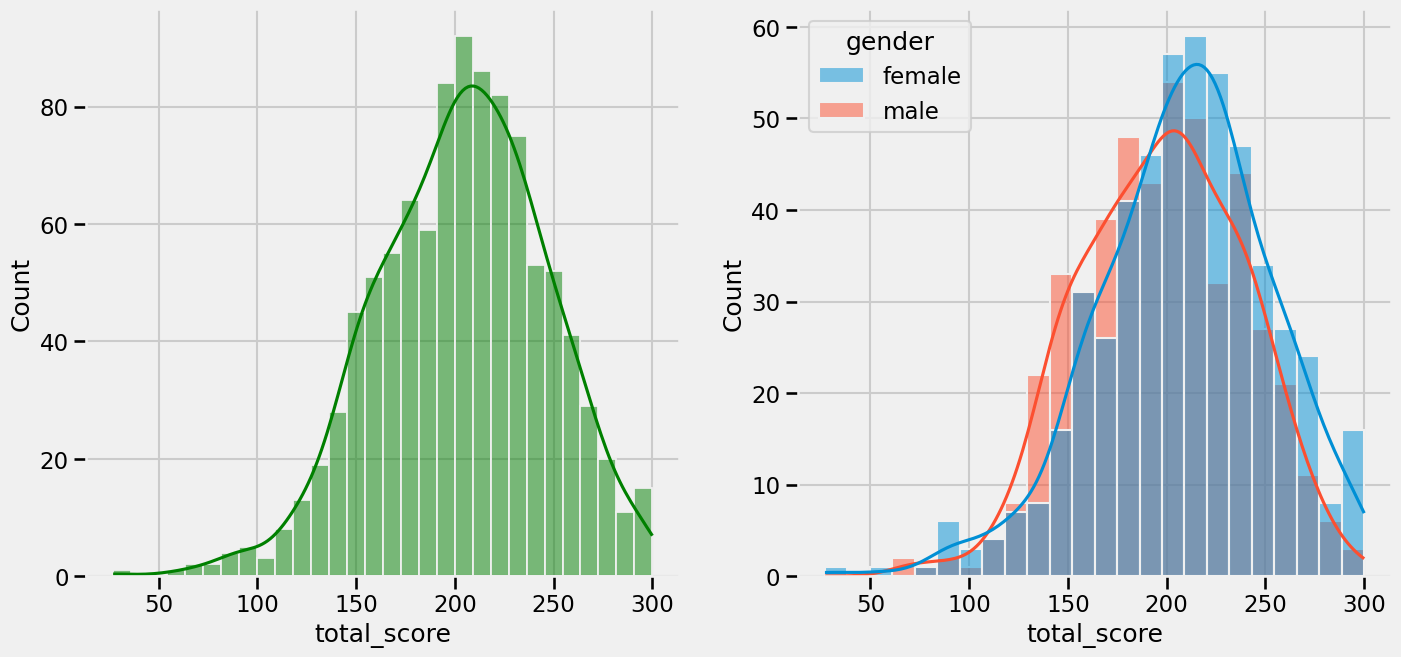

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)

sns.histplot(data= df, x= 'total_score', bins= 30, kde= True, color='g')
plt.subplot(122)

sns.histplot(data= df, x= 'total_score', kde= True, hue= 'gender')
plt.show()

#### Insights
* From above plots/graphs we can conclude that _Female students tend to perform well then male students_

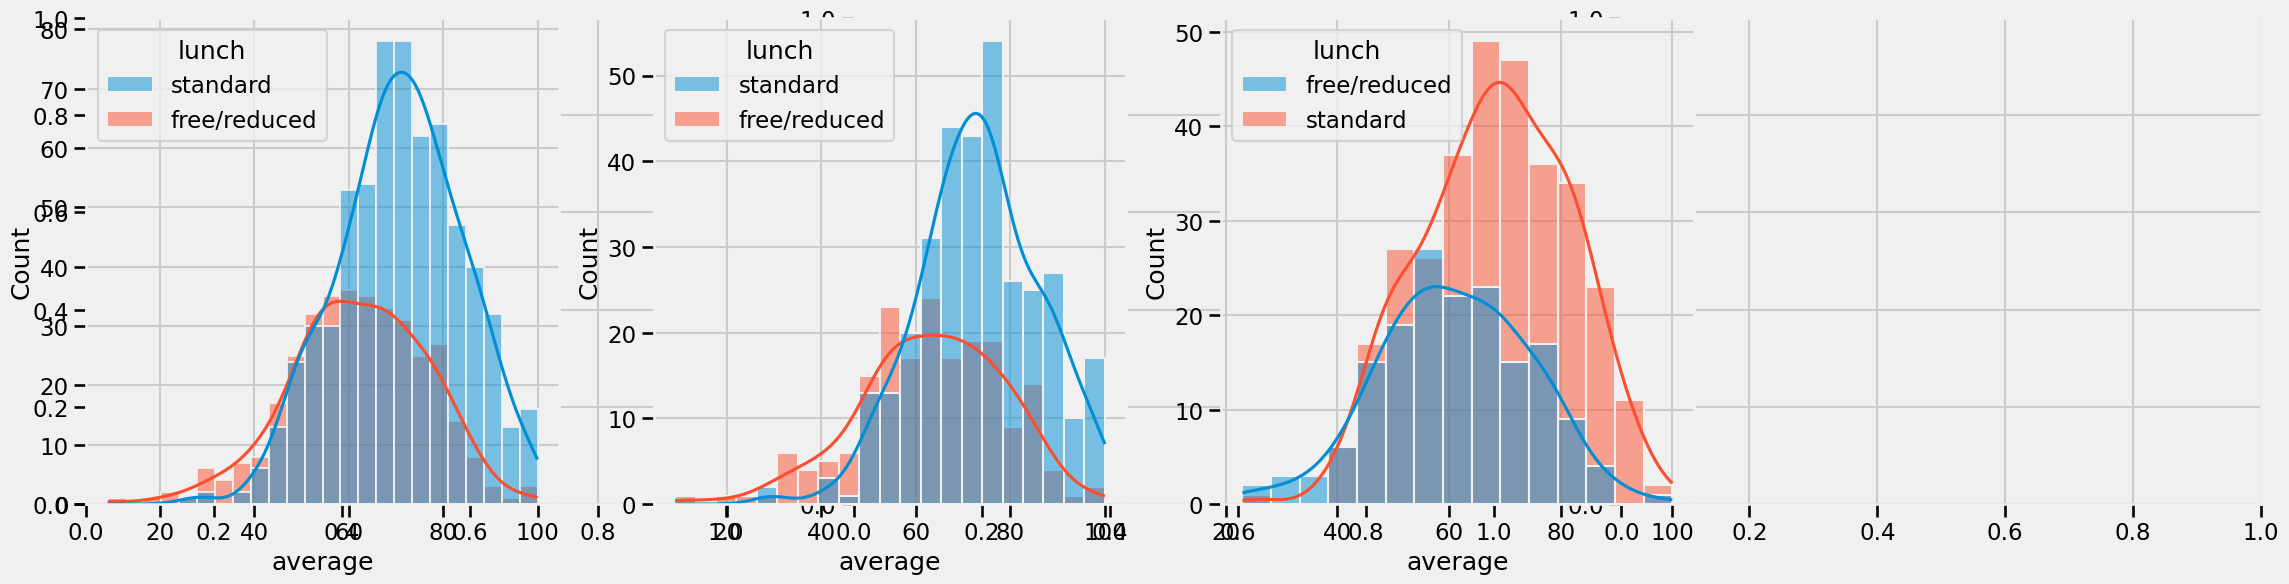

In [91]:
plt.subplots(1, 3, figsize= (25,6))
plt.subplot(141)

sns.histplot(data= df, x= 'average', kde= True, hue= 'lunch')
plt.subplot(142)

sns.histplot(data= df[df.gender=='female'], x= 'average', kde= True, hue= 'lunch')
plt.subplot(143)

sns.histplot(data= df[df.gender=='male'], x='average', kde= True, hue= 'lunch')
plt.show()

#### Insights
- Students who receive a **standard lunch** tend to perform **better** in exams compared to  **free/reduced lunch** for both male and female.
- This suggests that **nutrition quality may impact cognitive ability and test performance**
- Further analysis can explore whether **socioeconomic background** influences this trend

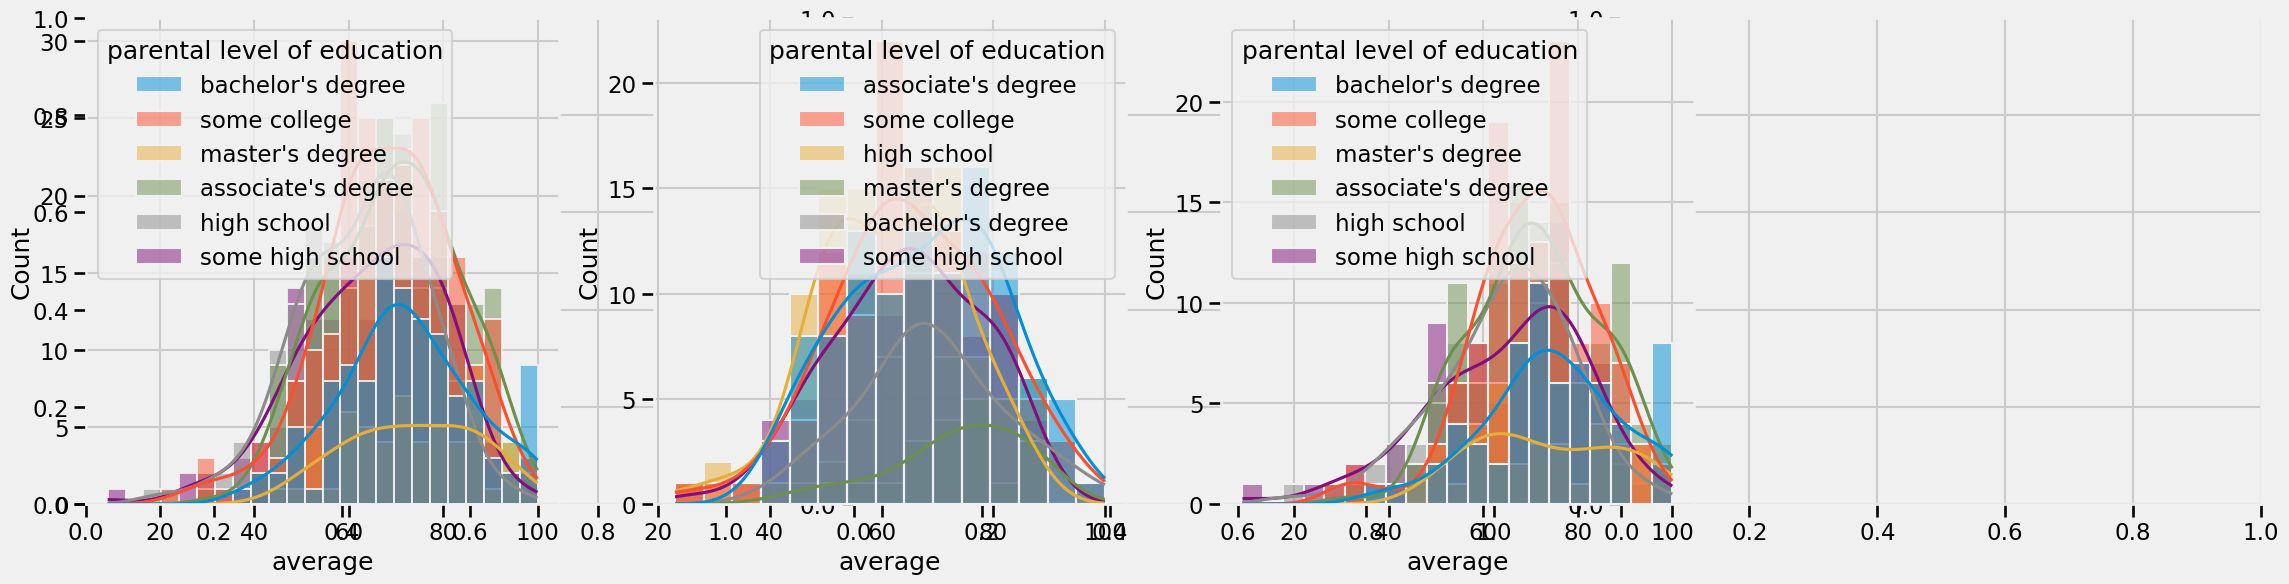

In [92]:
plt.subplots(1, 3, figsize= (25,6))
plt.subplot(141)

ax = sns.histplot(data= df, x= 'average', kde= True, hue= 'parental level of education')
plt.subplot(142)

ax = sns.histplot(data= df[df.gender=='male'], x= 'average', kde= True, hue='parental level of education')
plt.subplot(143)

ax = sns.histplot(data= df[df.gender=='female'], x= 'average', kde= True, hue='parental level of education')
plt.show()

#### Insights
- In general parent's education helps students to perform well in exam
- **Higher parental education → Better scores**, especially for students with **bachelor/master’s degree of parents** (scores peak in the 70-100 range)
- **Lower parental education → More score variation**, with many students scoring below 60
- **Associate’s degree & some college** → Moderate performance clustering around **60-80 range**
- **Parental education has minimal impact on female students' performance** (3rd plot)
- **Overall, performance distribution is right-skewed**, with most students scoring **above 50**



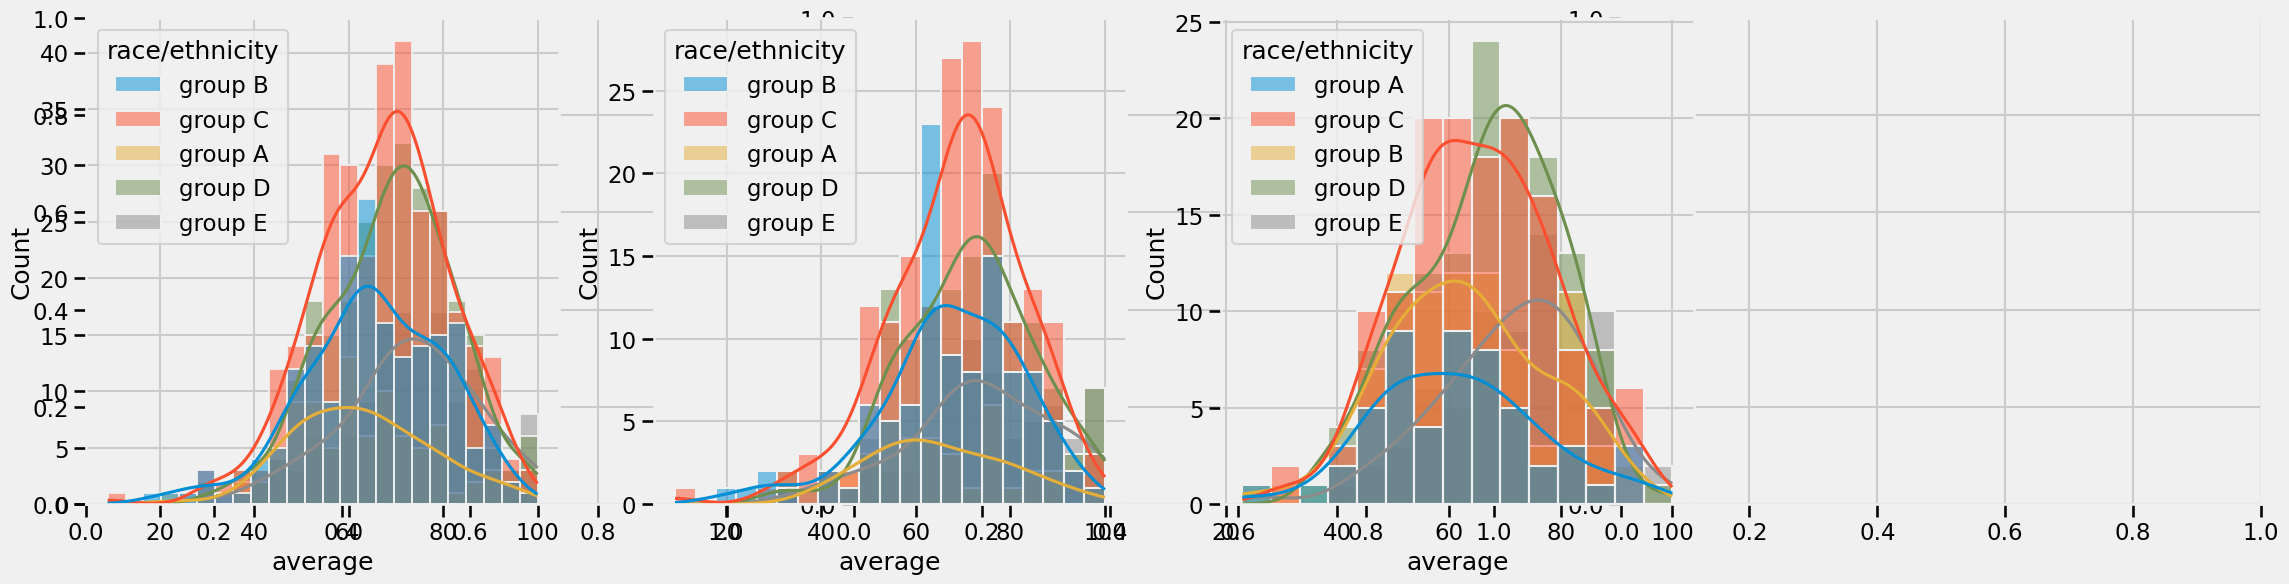

In [93]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)

ax = sns.histplot(data= df, x= 'average', kde= True, hue= 'race/ethnicity')
plt.subplot(142)

ax = sns.histplot(data= df[df.gender=='female'], x= 'average', kde= True, hue='race/ethnicity')
plt.subplot(143)

ax = sns.histplot(data= df[df.gender=='male'], x= 'average', kde= True, hue='race/ethnicity')
plt.show()

#### Insights
- **Groups A & B tend to have lower performance**, with most students scoring below 70 
- **Group C performs the best overall**, showing a higher peak in the **70-100 range** 
- **Groups D & E** have a more balanced distribution but still perform better than Groups A & B
- **Performance trends are consistent across genders**, meaning ethnicity-related factors impact both male and female students similarly

### 4.3 Multivariate analysis using pieplot
* What is multi-variate analysis?
    - Multivariate Analysis is a statistical technique used to analyze multiple variables simultaneously to understand relationships, patterns, and dependencies among them
    - This helps determine which factors significantly affect math scores when analyzed together

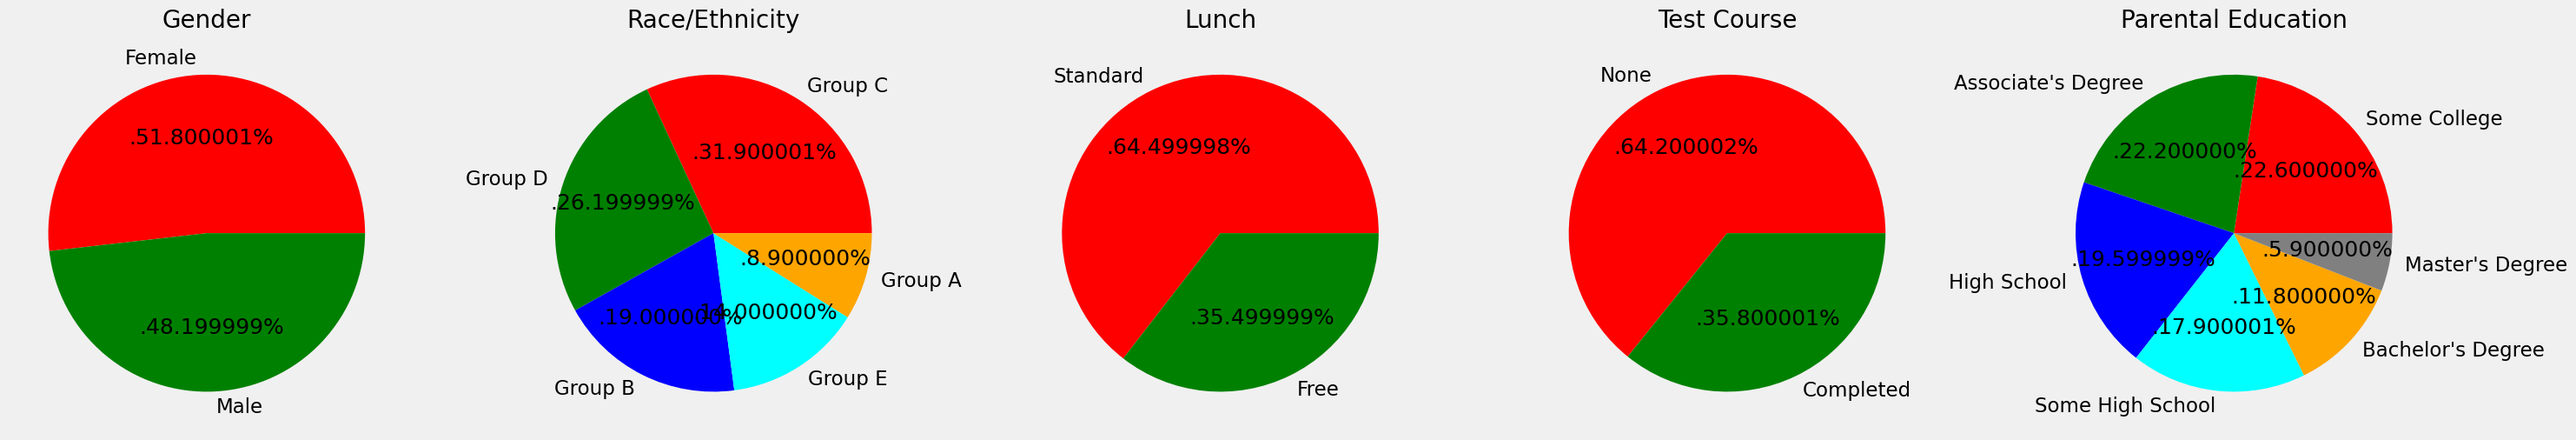

In [94]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#### Insights
- **Gender:** Almost equal distribution of male (48.2%) and female (51.8%) students
- **Race/Ethnicity:** Most students belong to **Group C**, followed by Groups D and B  
- **Lunch Type:** Majority of students receive **standard lunch** 
- **Test Preparation Course:** Most students **did not enroll** in a preparation course 
- **Parental Education:** **"Some College"** is the most common parental education level, followed closely by **"Associate’s Degree"**

### 4.4 Feature Wise Visualization
#### 4.4.1 Gender Columns
* How is distribution of gender?
* Is gender has any impact on student's performance

#### Univariate Analysis (To understand How is the distribution of Gender ?)
* Univariate Analysis is a statistical technique used to analyze and summarize a single variable at a time. 
* It helps in understanding the distribution, central tendency, and spread of the data

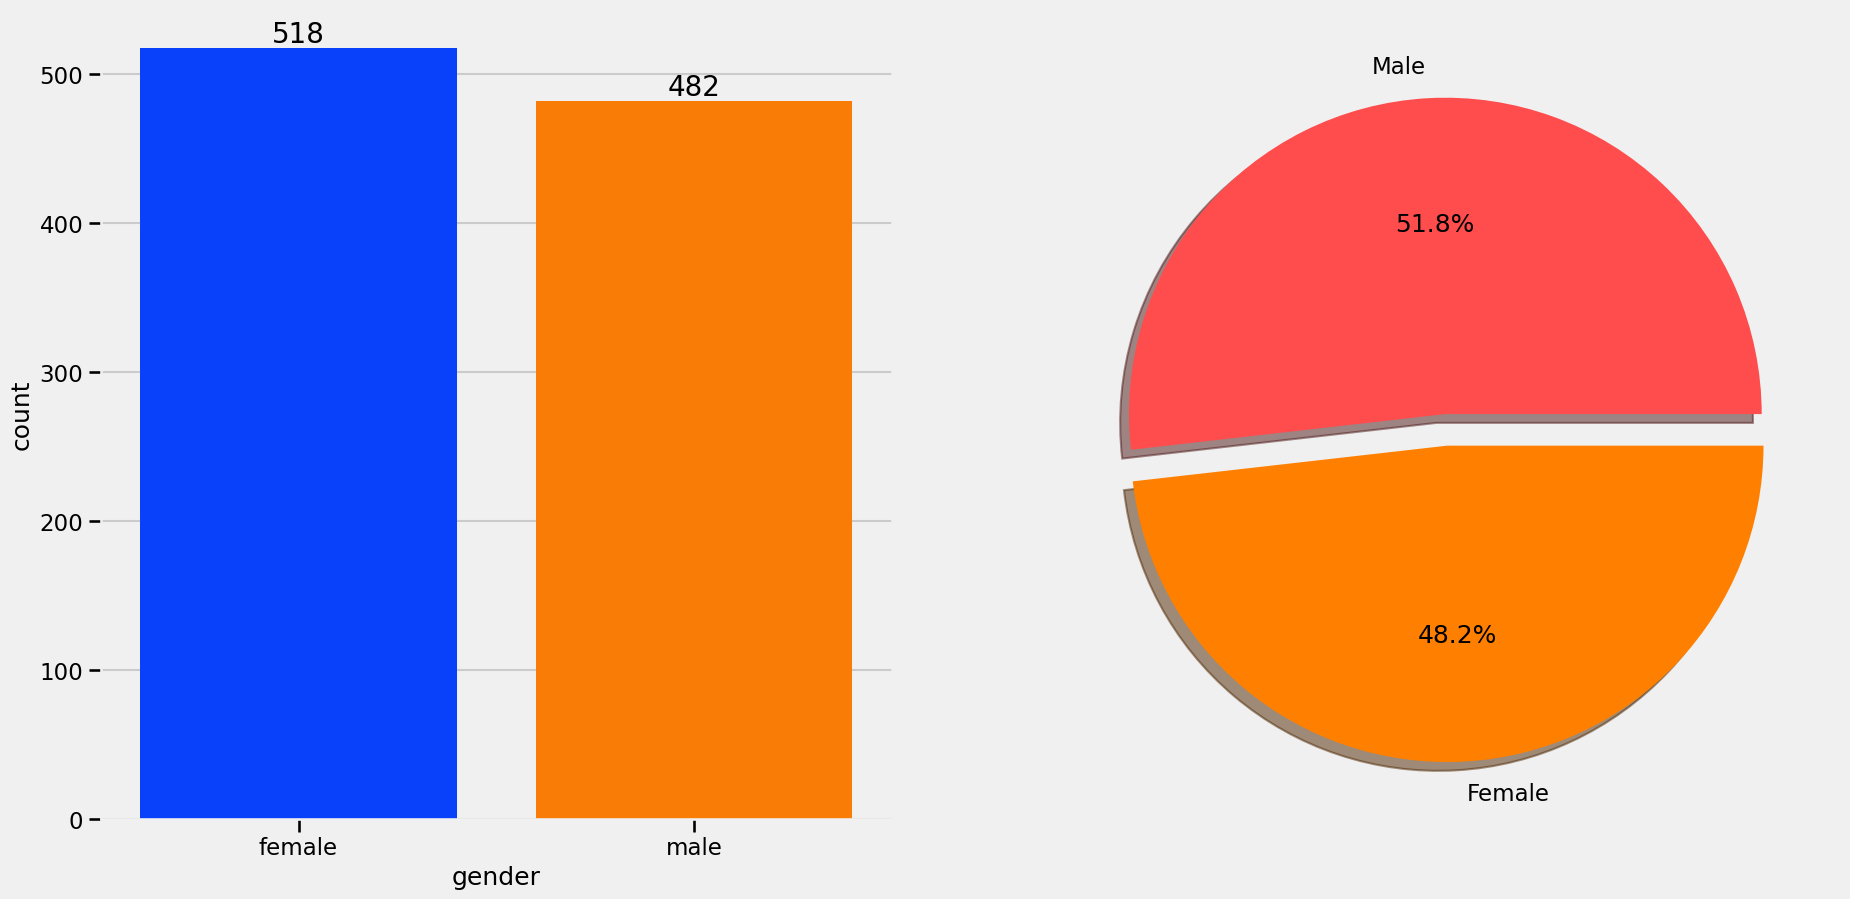

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette ='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
- The dataset has a **balanced gender distribution** i.e. **Female students:** 518 (_51.8%_)  & **Male students:** 482 (_48.2%_)  
- This is nearly equal representation which ensures there is no **gender bias** in the dataset

### Bivariate Analysis (Is gender has any impact on student's perforamce ?)
* Bivariate Analysis is a statistical technique used to analyze the relationship between two variables

In [96]:
# Creating group of gender
gender_group = df.groupby("gender").mean(numeric_only=True)     # To ensures that only numeric columns are considered when calculating the mean
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


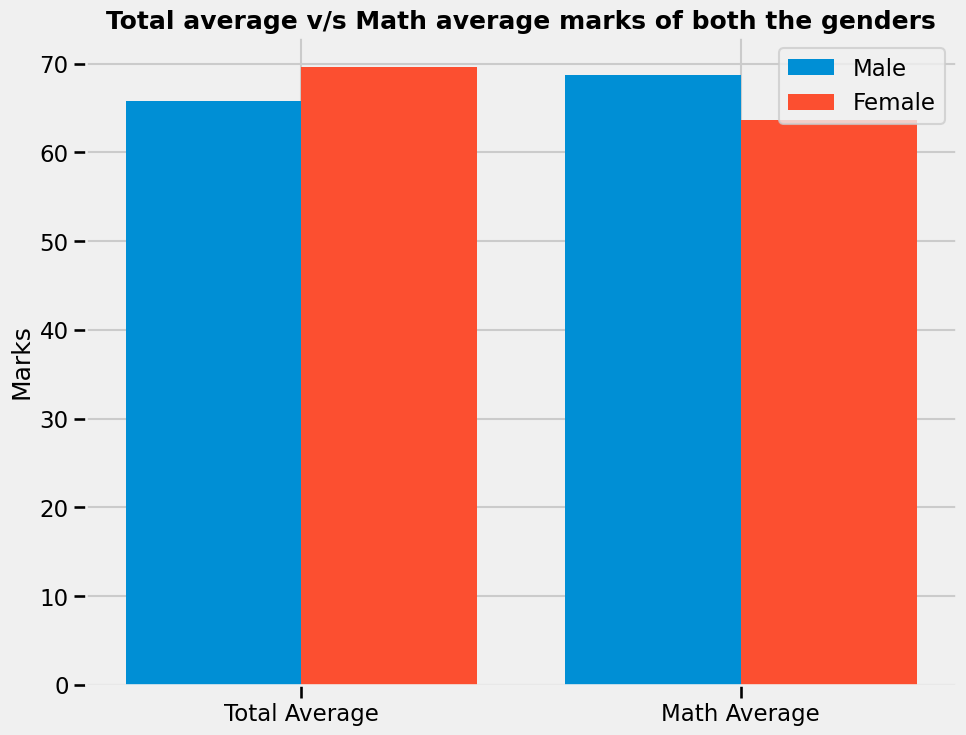

In [97]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
* On an average females have a better overall score than males; whereas males have scored higher in Maths

### 4.4.2 Race/Ehnicity Column
* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?

### Univariate Analysis ( How is Group wise distribution ?)

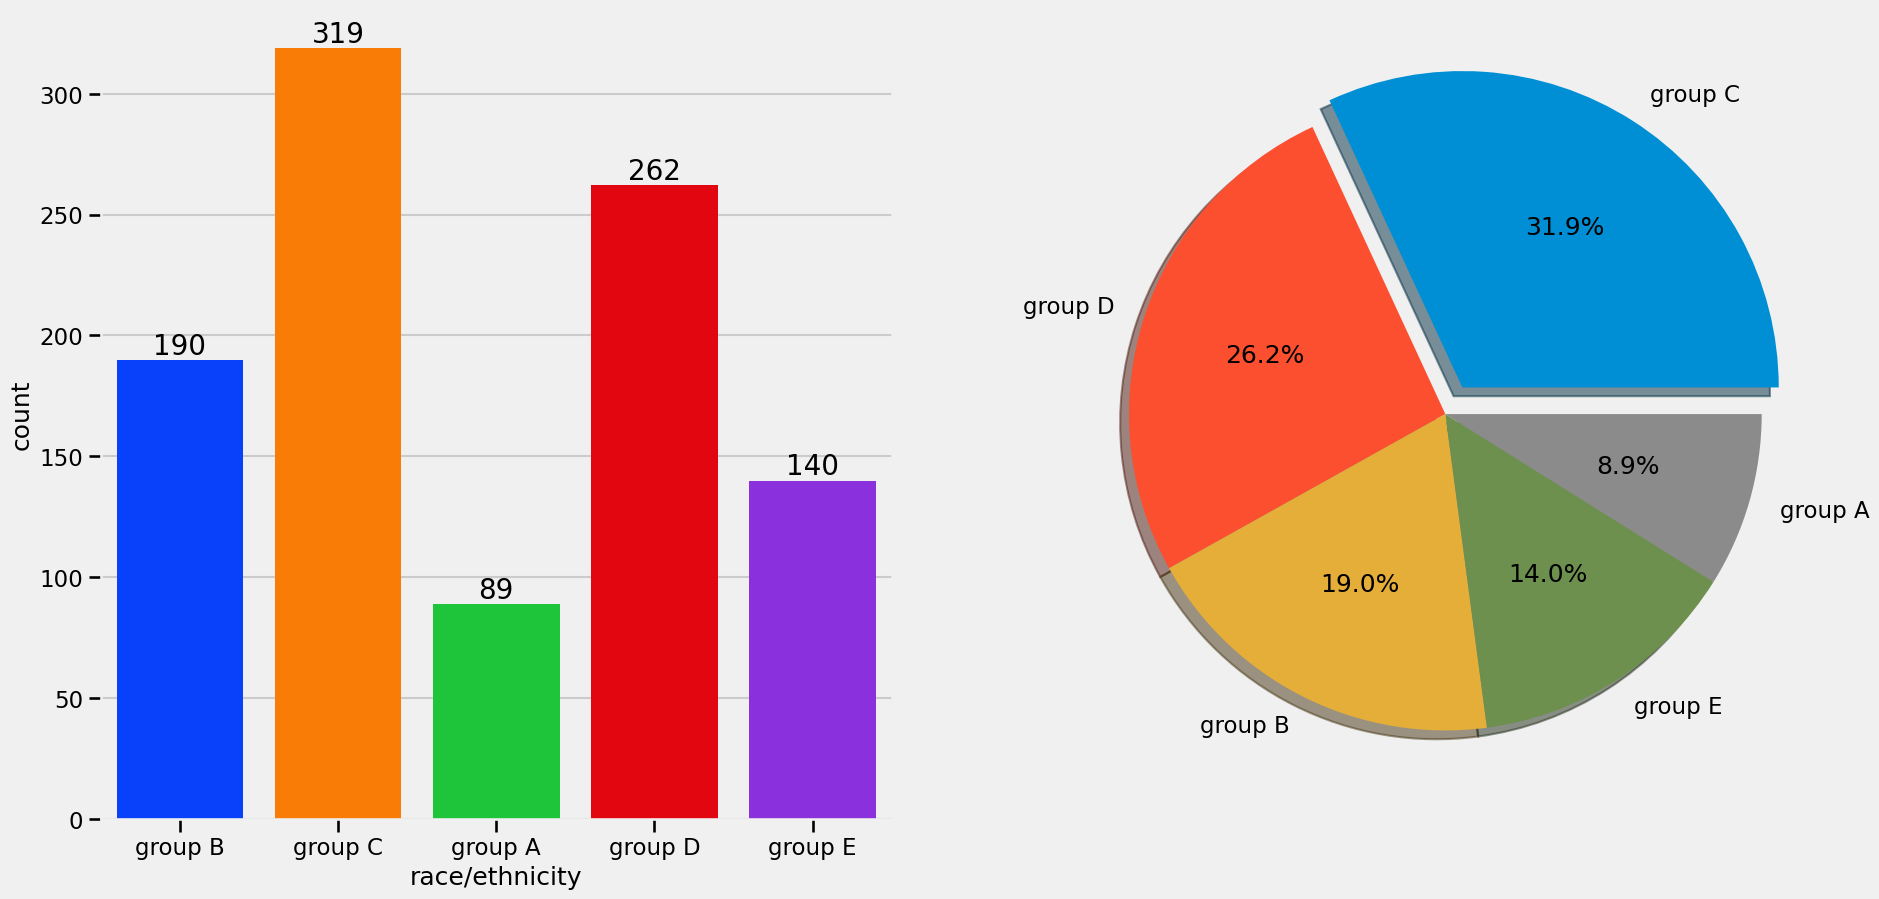

In [98]:
f, ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights
* Most of the student belonging from group C / group D
* Lowest number of students belong to groupA

### Bivariate Analysis (Is Race/Ehnicity has any impact on student's performance ? )

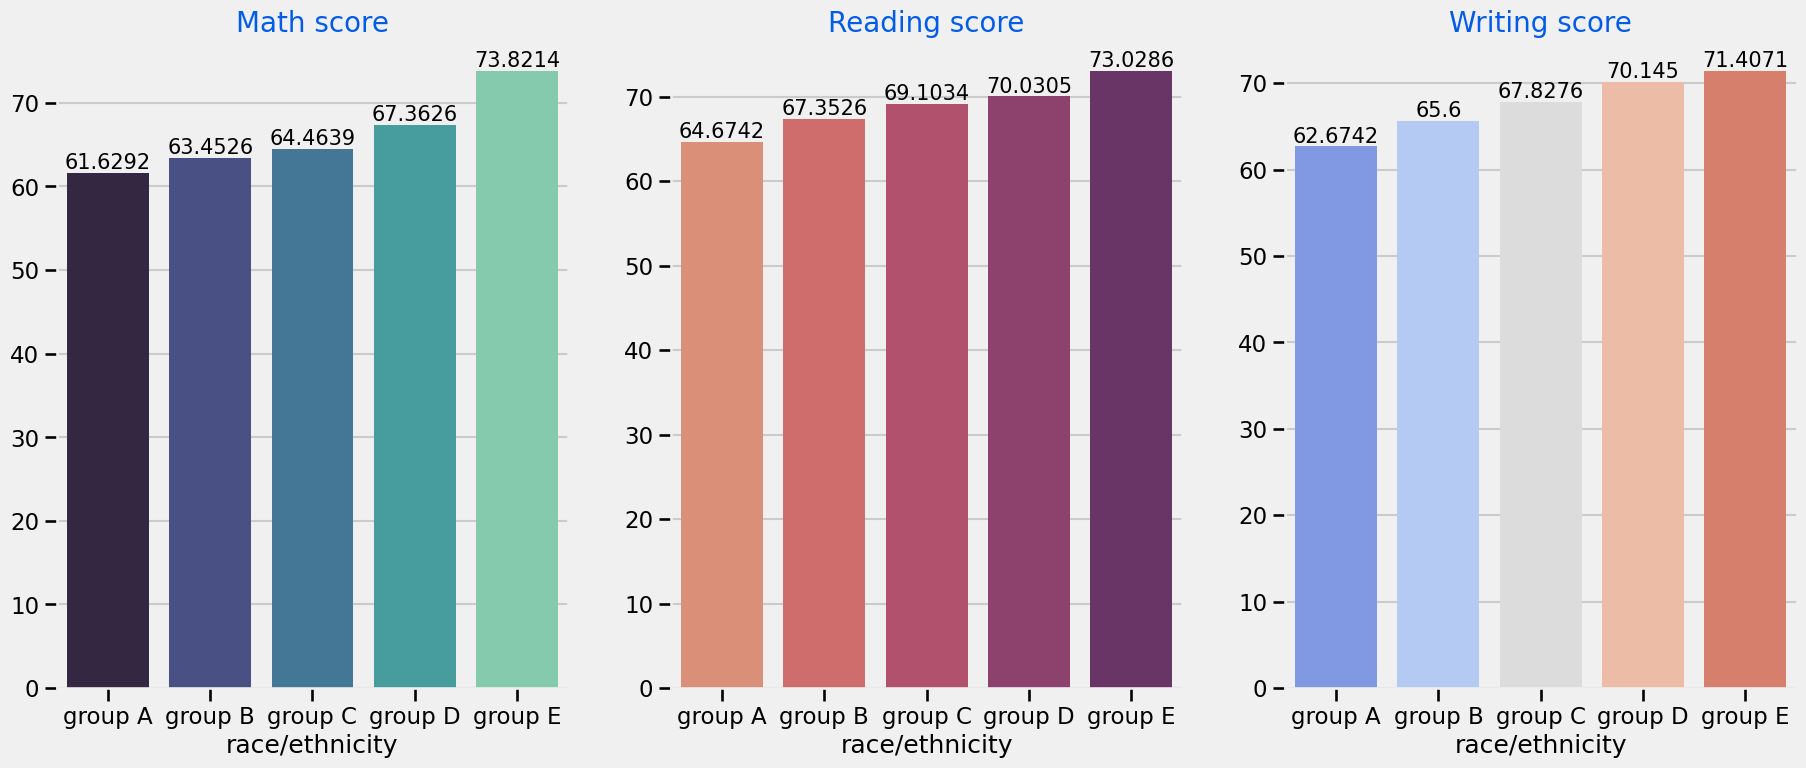

In [99]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

### Univariate Analysis (What is educational background of student's parent ? )

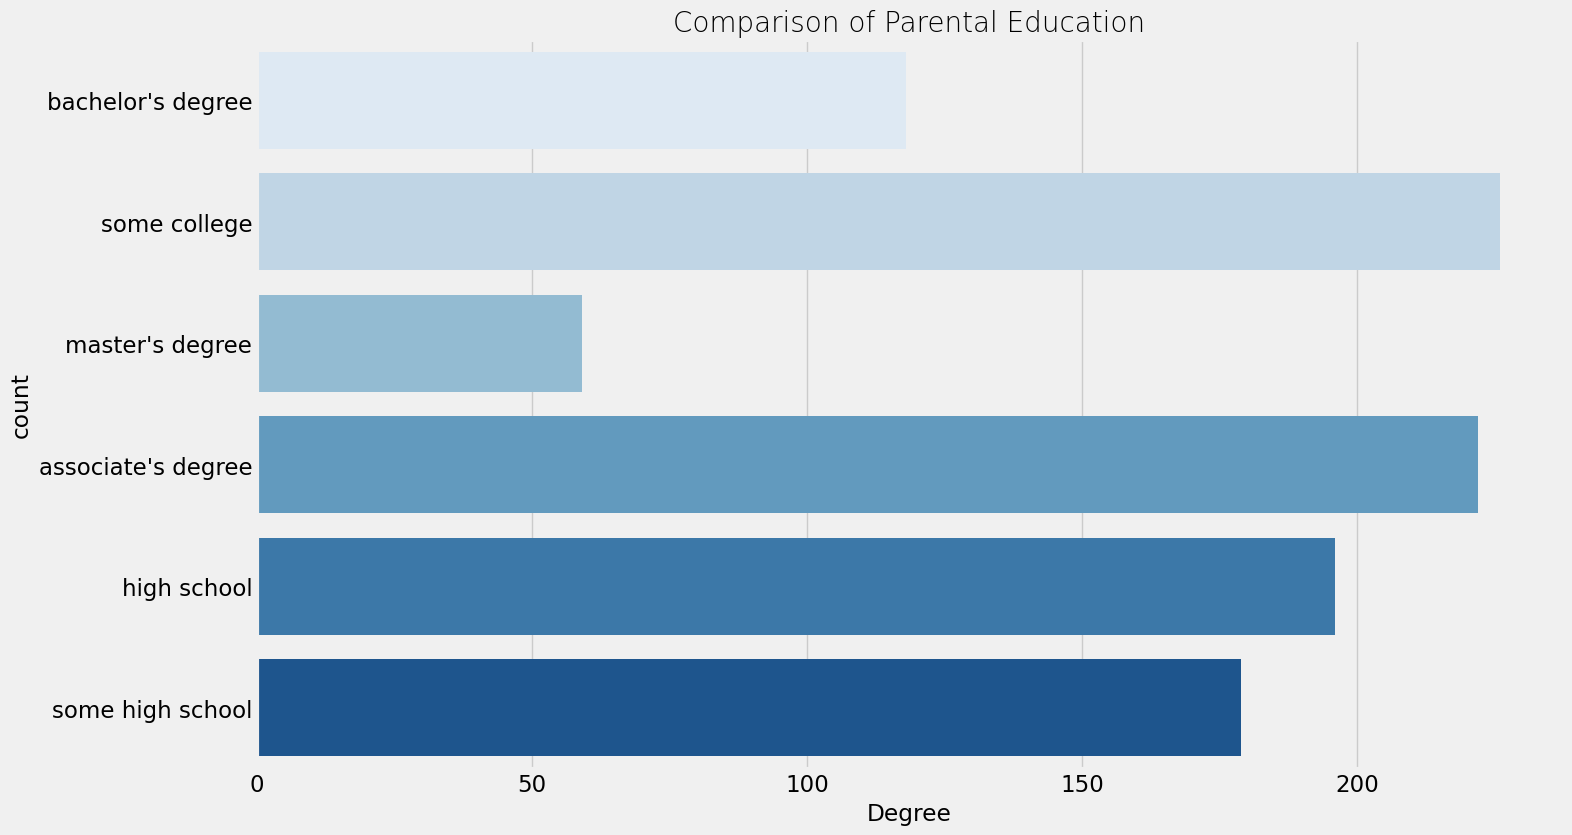

In [100]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights
* Largest number of parents are from some college.

### Bivariate Analysis (Is parental education has any impact on student's performance ? )

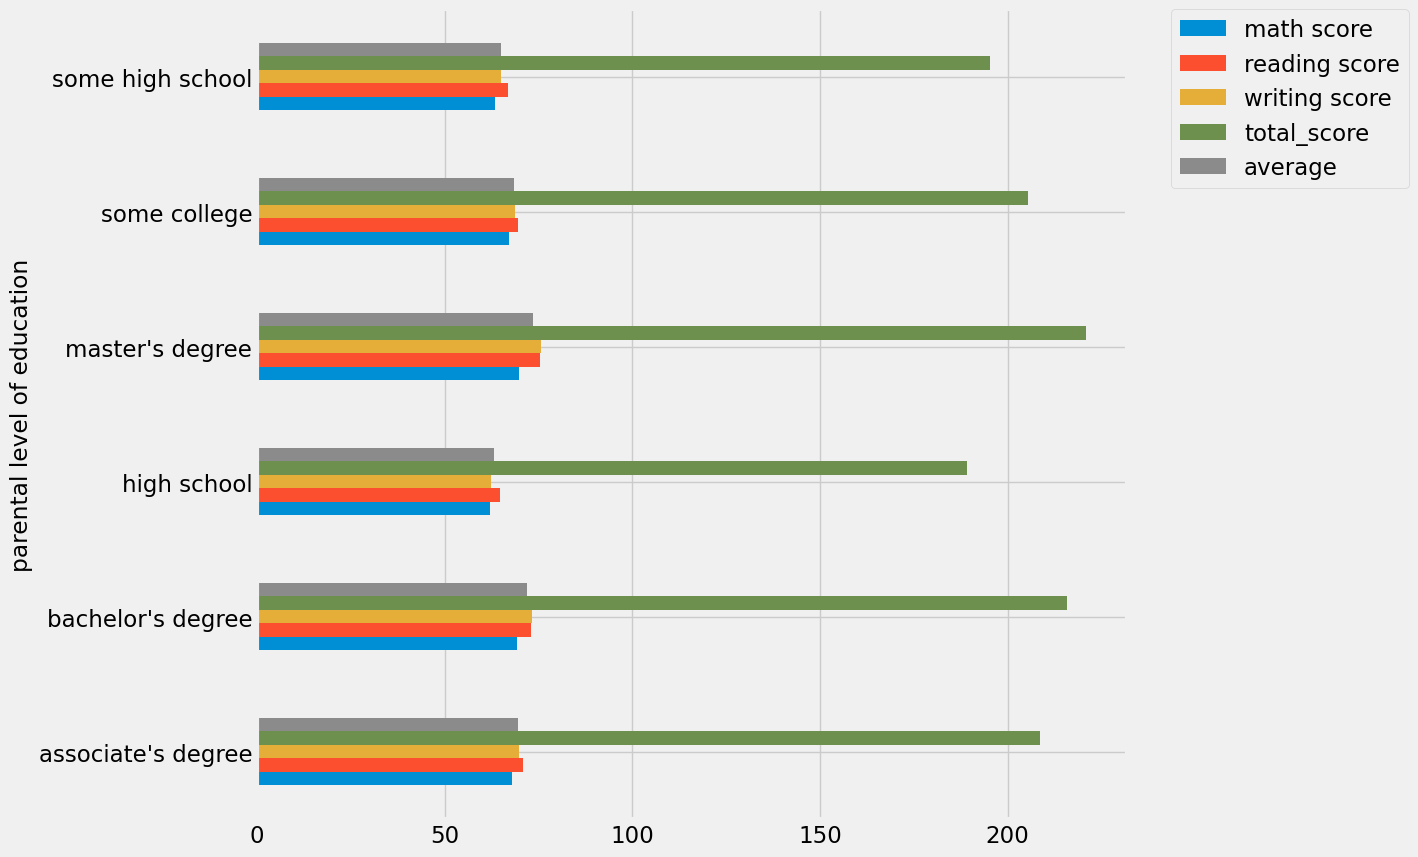

In [101]:
df.groupby("parental level of education").mean(numeric_only=True).plot(kind="barh", figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### Insights
* The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 Lunch Column
* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?

### Univariate Analysis (Which type of lunch is most common amoung students ? )

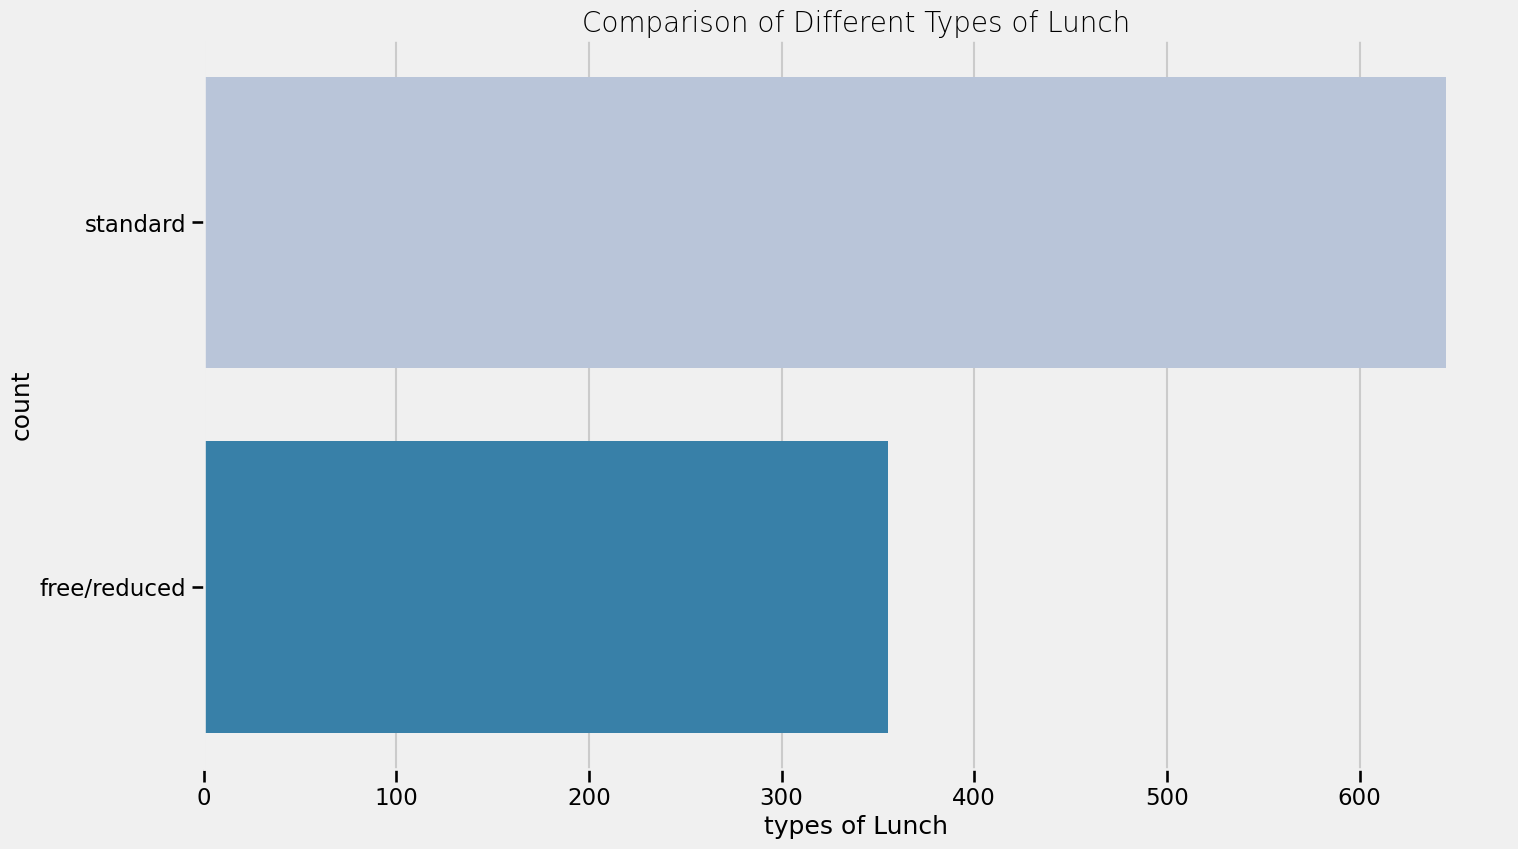

In [102]:
plt.rcParams['figure.figsize'] = (15, 9)  
sns.set_context("talk")
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of Different Types of Lunch', fontweight=30, fontsize=20)
plt.xlabel('types of Lunch')
plt.ylabel('count')
plt.show()

### Insights
- More students receive **standard lunch** compared to **free/reduced lunch**  
- This suggests that a majority of students come from families that can afford standard meal plans  
- The difference in numbers might indicate a link between **socioeconomic background and student population distribution**

### Bivariate Analysis (Is lunch type intake has any impact on student's performance ?)

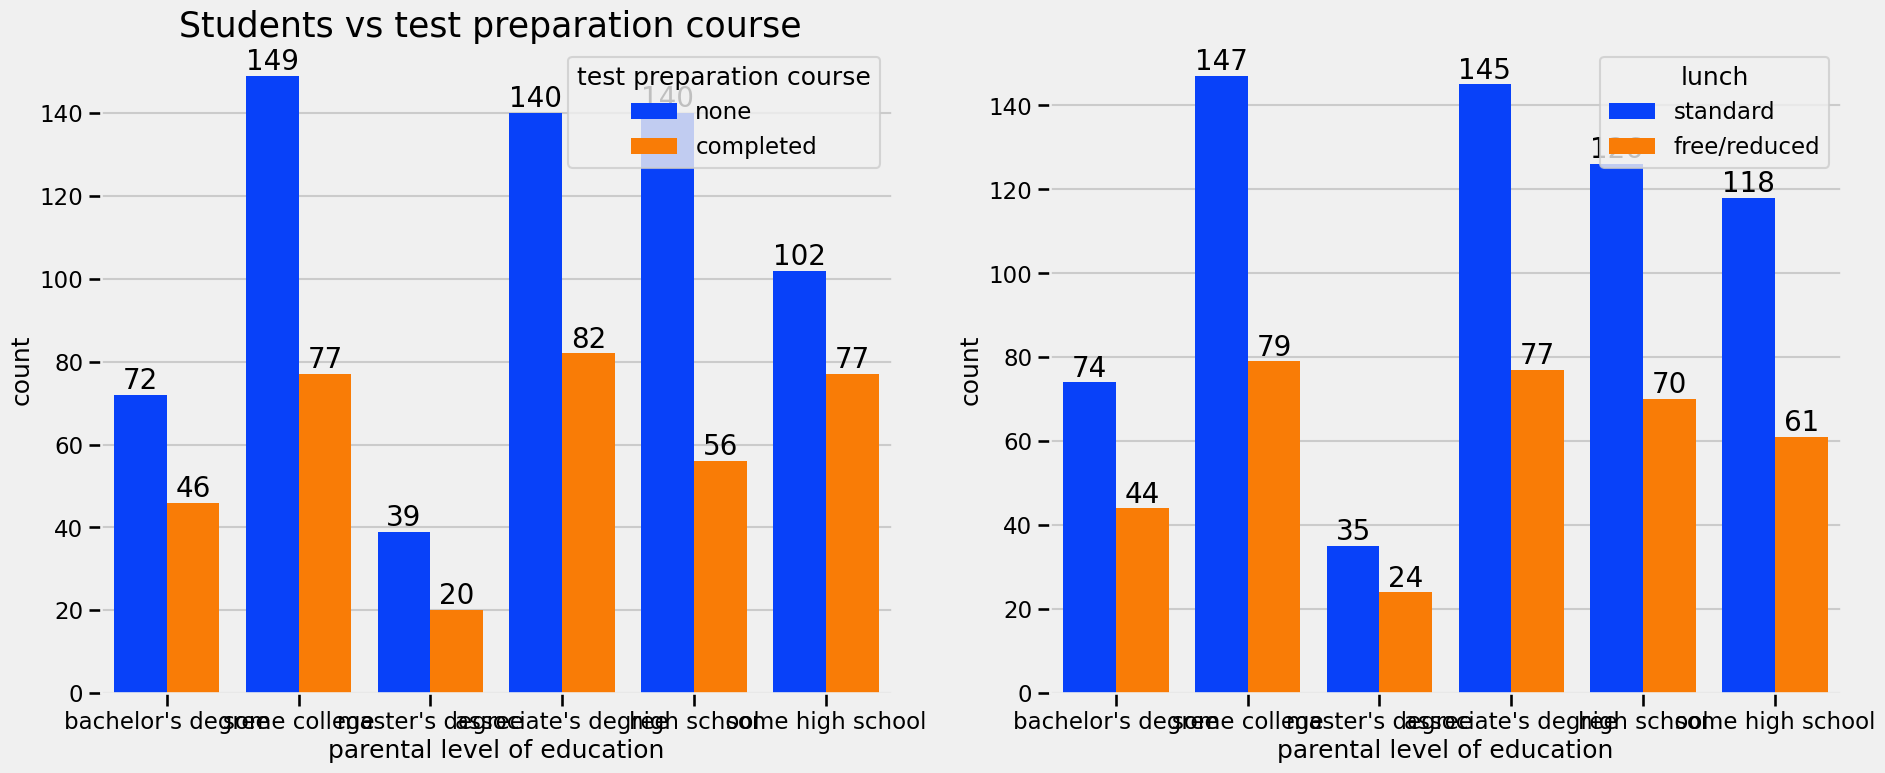

In [103]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

#### Insights
- **Students who received Standard Lunch are performed better** than those with _Free/Reduced Lunch_
- **More students did not complete test preparation courses**, but those who completed it tend to have better performance.  
 
### 4.4.5 TEST PREPARATION COURSE COLUMN
* Which type of lunch is most common among students ?
* Is Test prepration course has any impact on student's performance ?

### Bivariate Analysis (Is Test prepration course has any impact on student's performance ?)

<Axes: xlabel='lunch', ylabel='writing score'>

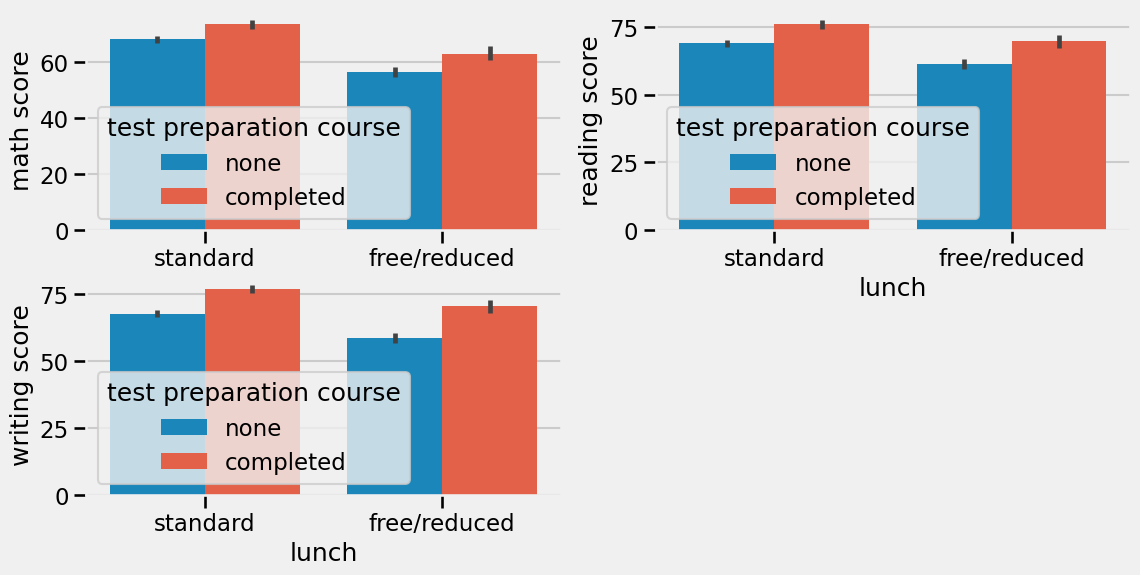

In [104]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)

sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)

sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)

sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't completed the course

### 4.4.6 CHECKING OUTLIERS

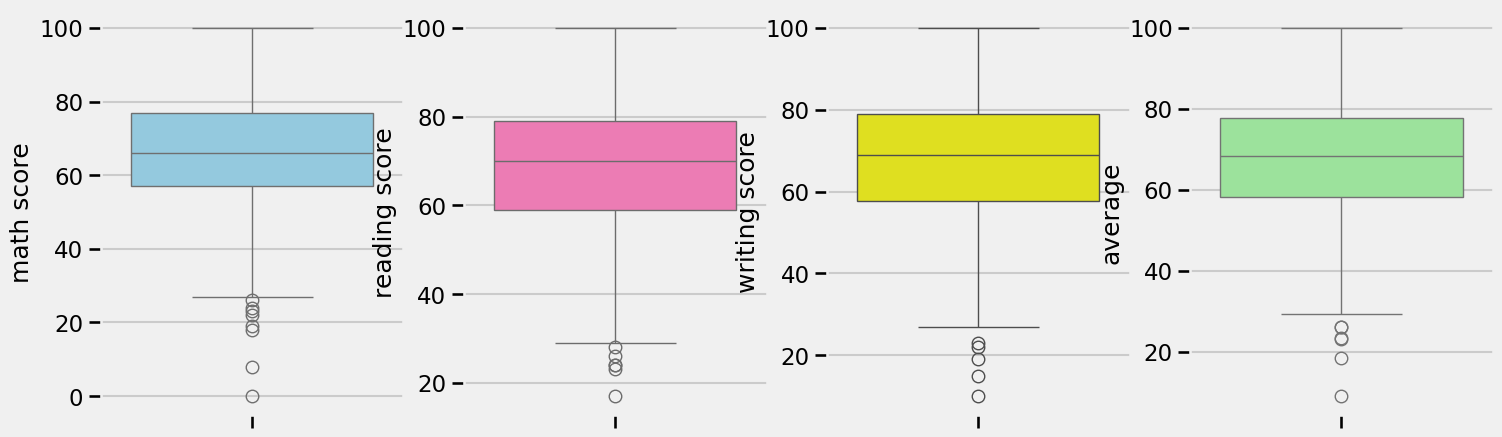

In [105]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)

sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)

sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)

sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)

sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### Insights

- **Math, Reading, and Writing scores** have a similar distribution, with median scores around **65-75**
- **Outliers are present in all subjects**, indicating a few students scored significantly lower than the majority 
- **Reading and Writing scores** tend to be slightly higher than Math scores on average
- The **lower whiskers indicate some students scored below 20**, suggesting a small group of struggling students

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT
* What is pairplot?
    - A pairplot is a visualization tool in Seaborn that plots pairwise relationships between multiple numerical variables in a dataset

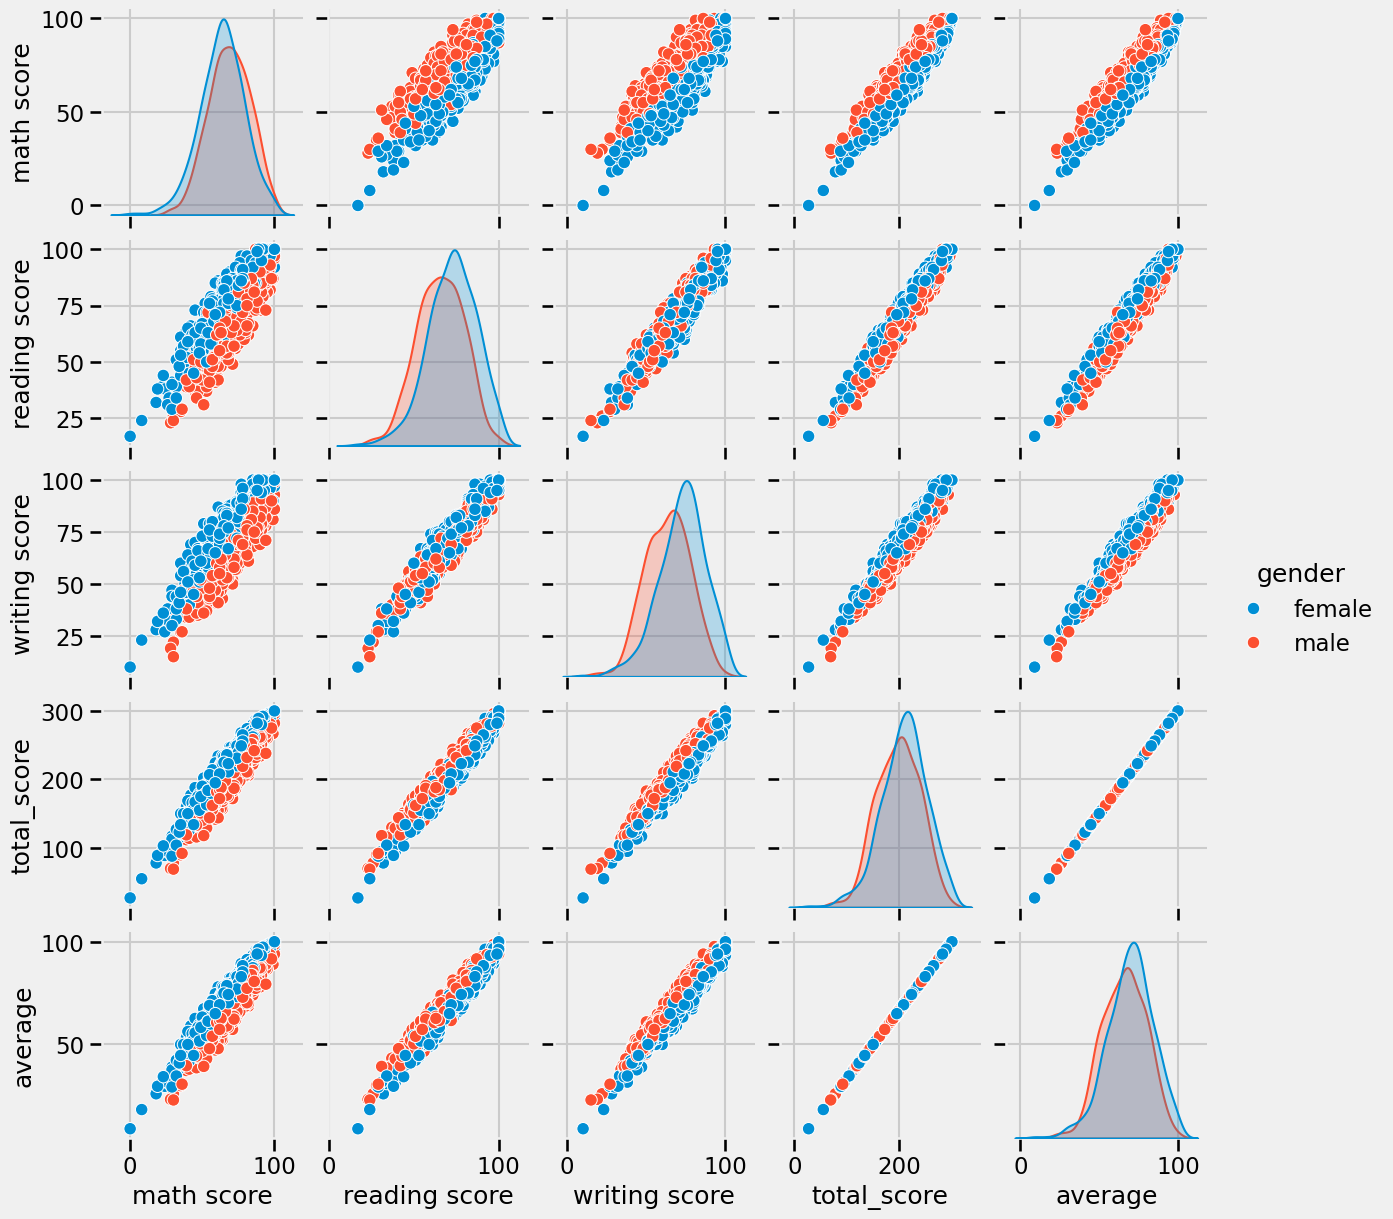

In [106]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other
- **Linear relationships** exist among total scores and individual subject scores
- **Scores in math, reading, and writing are strongly correlated**—students who perform well in one subject tend to score well in others  

### 5. Conclusions
* Student performance is influenced by factors like lunch type, race, and parental education level
* Female students leading in reading and writing scores; however having higher pass percentage and dominates in top scores.
* Male students perform better in math
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial

In [107]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00
998,female,group D,some college,standard,completed,68,78,77,223,74.33
